In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from nltk.classify import NaiveBayesClassifier
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data = pd.read_csv("C:\\Users\\shama\\Desktop\\cleaned_data.csv")
data

,Category,Cleaned_Resumes,Encoded_Skill
0,React JS Developer Resume,name ravali p curriculum vitae specialization ...,1
1,React JS Developer Resume,mareedu lokesh babu professional overview arou...,1
2,React JS Developer Resume,susovan bag seeking a challenging position in ...,1
3,React JS Developer Resume,haripriya battina experience as ui developer i...,1
4,React JS Developer Resume,name m prabakaran title ui developer professio...,1
...,...,...,...
74,Workday Resume,years of it experience as workday hcm technica...,3
75,Workday Resume,ramesh a workday hcm consultant professional s...,3
76,Workday Resume,name j sumanth royal professional summary have...,3
77,Workday Resume,vinay kumar v workday functional consultant ex...,3


# TF-IDF

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
requiredText = data['Cleaned_Resumes'].values
requiredTarget = data['Encoded_Skill'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures, requiredTarget, random_state=0, test_size=0.2)
print("X Train shape:",x_train.shape)
print("Y Train shape:",y_train.shape)
print("x Test shape:",x_test.shape)
print("y Test shape:",y_test.shape)

X Train shape: (63, 4736)
Y Train shape: (63,)
x Test shape: (16, 4736)
y Test shape: (16,)


# 1. LOGISTIC REGRESSION

In [7]:
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,classification_report

lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [8]:
predict1 = lg.predict(X_test)

In [9]:
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

0.875

In [10]:
cm = confusion_matrix(y_test,predict1)
cm

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 3, 0],
       [0, 0, 0, 6]], dtype=int64)

Text(33.0, 0.5, 'Truth')

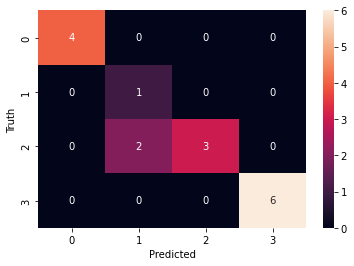

In [63]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [11]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.33      1.00      0.50         1
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         6

    accuracy                           0.88        16
   macro avg       0.83      0.90      0.81        16
weighted avg       0.96      0.88      0.89        16



In [12]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [13]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.875
Precision Score :  0.8333
Recall Score    :  0.9
f1-Score        :  0.8125


# 2. Decision Tree Classifier

In [15]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict2=dt.predict(X_test)

In [16]:
accuracy_2 = accuracy_score(y_test,predict5)
accuracy_2

0.875

In [17]:
cm2=confusion_matrix(y_test,predict2)
cm2

array([[3, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 3, 0],
       [1, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

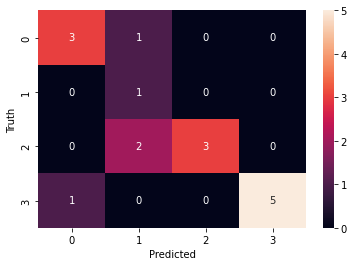

In [64]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [18]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.25      1.00      0.40         1
           2       1.00      0.60      0.75         5
           3       1.00      0.83      0.91         6

    accuracy                           0.75        16
   macro avg       0.75      0.80      0.70        16
weighted avg       0.89      0.75      0.79        16



In [19]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.75
Precision Score :  0.75
Recall Score    :  0.7958
f1-Score        :  0.7023


# 3. Random Forest Classifier

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict3=rf.predict(X_test)

In [24]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

0.9375

In [25]:
cm3 = confusion_matrix(y_test,predict3)
cm3

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 4, 0],
       [0, 0, 0, 6]], dtype=int64)

Text(33.0, 0.5, 'Truth')

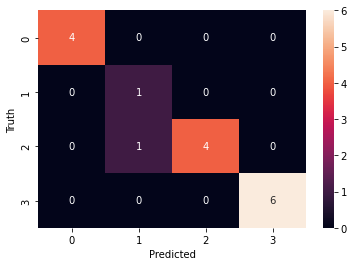

In [65]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [26]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      1.00      0.67         1
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6

    accuracy                           0.94        16
   macro avg       0.88      0.95      0.89        16
weighted avg       0.97      0.94      0.94        16



In [27]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  0.9375
Precision Score :  0.875
Recall Score    :  0.95
f1-Score        :  0.8889


# 4. Naive-Bayes Classifier

In [28]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict4=nb.predict(X_test)

In [29]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.75

In [30]:
cm4=confusion_matrix(y_test,predict4)
cm4

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 4, 1, 0],
       [0, 0, 0, 6]], dtype=int64)

Text(33.0, 0.5, 'Truth')

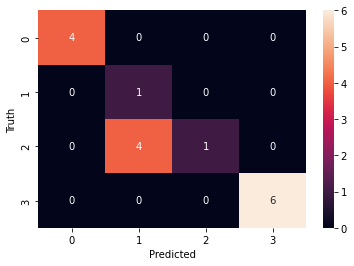

In [66]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [31]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.20      1.00      0.33         1
           2       1.00      0.20      0.33         5
           3       1.00      1.00      1.00         6

    accuracy                           0.75        16
   macro avg       0.80      0.80      0.67        16
weighted avg       0.95      0.75      0.75        16



In [32]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Accuracy Score  :  0.75
Precision Score :  0.8
Recall Score    :  0.8
f1-Score        :  0.6667


# 5. Support Vector Machine Classifier(SVC)

In [33]:
sv = SVC()
sv.fit(X_train,y_train)
predict5 = sv.predict(X_test)

In [35]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

0.75

In [36]:
cm5 = confusion_matrix(y_test,predict5)
cm5

array([[3, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 3, 2, 0],
       [0, 0, 0, 6]], dtype=int64)

Text(33.0, 0.5, 'Truth')

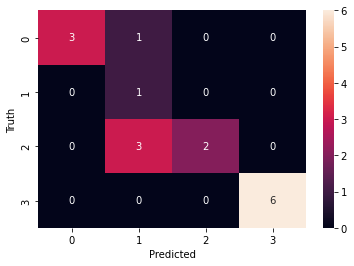

In [67]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [37]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.20      1.00      0.33         1
           2       1.00      0.40      0.57         5
           3       1.00      1.00      1.00         6

    accuracy                           0.75        16
   macro avg       0.80      0.79      0.69        16
weighted avg       0.95      0.75      0.79        16



In [38]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

In [39]:
print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  0.75
Precision Score :  0.8
Recall Score    :  0.7875
f1-Score        :  0.6905


# 6. AdaBoost Classifier

In [40]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [41]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

0.75

In [42]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[3, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 3, 0],
       [1, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

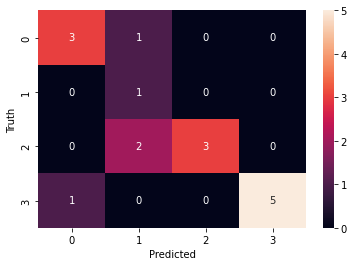

In [68]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [43]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.25      1.00      0.40         1
           2       1.00      0.60      0.75         5
           3       1.00      0.83      0.91         6

    accuracy                           0.75        16
   macro avg       0.75      0.80      0.70        16
weighted avg       0.89      0.75      0.79        16



In [44]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.75
Precision Score :  0.75
Recall Score    :  0.7958
f1-Score        :  0.7023


# 7. GradientBoosting Classifier

In [45]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)

In [46]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

0.875

In [47]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[3, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 5, 0],
       [1, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

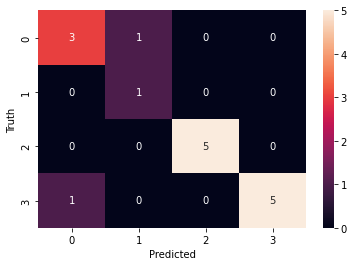

In [69]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [48]:
print(classification_report(y_test,predict7))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         5
           3       1.00      0.83      0.91         6

    accuracy                           0.88        16
   macro avg       0.81      0.90      0.83        16
weighted avg       0.91      0.88      0.88        16



In [49]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  0.875
Precision Score :  0.8125
Recall Score    :  0.8958
f1-Score        :  0.8314


# 8. XGBoost Classifier

In [50]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predict8 = xg.predict(X_test)

In [51]:
accuracy_8 = accuracy_score(y_test,predict8)
accuracy_8

0.75

In [52]:
cm8 = confusion_matrix(y_test,predict8)
cm8

array([[3, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 3, 0],
       [1, 0, 0, 5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

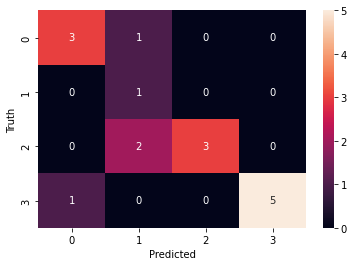

In [70]:
sns.heatmap(cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [53]:
print(classification_report(y_test,predict8))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.25      1.00      0.40         1
           2       1.00      0.60      0.75         5
           3       1.00      0.83      0.91         6

    accuracy                           0.75        16
   macro avg       0.75      0.80      0.70        16
weighted avg       0.89      0.75      0.79        16



In [54]:
accuracy_8 = round(accuracy_score(y_test,predict8),4)
precision_8 = round(precision_score(y_test,predict8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,predict8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,predict8, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

Accuracy Score  :  0.75
Precision Score :  0.75
Recall Score    :  0.7958
f1-Score        :  0.7023


In [57]:
table = {'Classifier' : ['Logistic Regression','SVM Classifier','Random Forest Classifier', 'Naive-Bayes Classifier','Decision Tree Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8]}
table = pd.DataFrame(table)
#table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,Logistic Regression,0.8750,0.8333,0.9000,0.8125
1,SVM Classifier,0.7500,0.7500,0.7958,0.7023
2,Random Forest Classifier,0.9375,0.8750,0.9500,0.8889
3,Naive-Bayes Classifier,0.7500,0.8000,0.8000,0.6667
4,Decision Tree Classifier,0.7500,0.8000,0.7875,0.6905
5,AdaBoost Classifier,0.7500,0.7500,0.7958,0.7023
6,Gradient Boosting Classifier,0.8750,0.8125,0.8958,0.8314
7,Xtreme Gradient Boosting Classifier,0.7500,0.7500,0.7958,0.7023


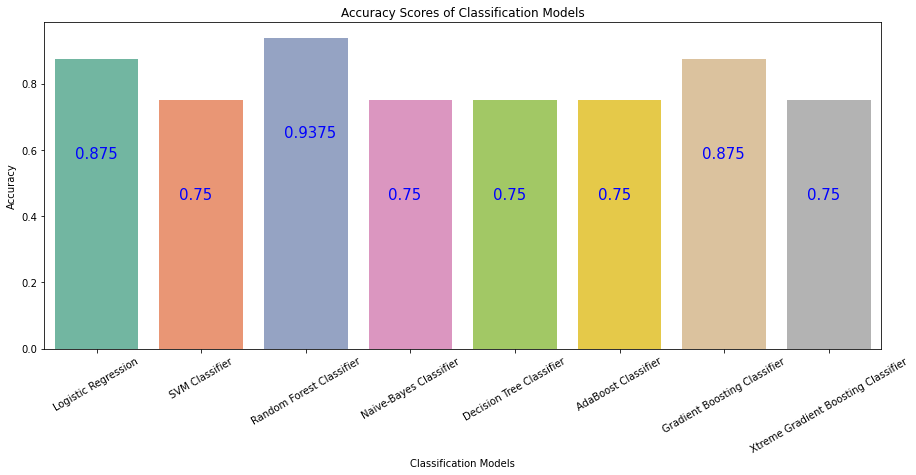

In [72]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=table.Classifier, y=table.Accuracy, palette =sns.color_palette("Set2") )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()

We finalize RANDOM FOREST as it gives 93% Accuracy. Random Forest fits the model in Resume Classification.

In [73]:
import pickle
from pickle import dump
from pickle import load

In [75]:
dump(rf ,open('Random_Forest_model.pkl','wb'))